# MD Simulations
### Problem 1: Epidemic simulation

Number of contaminated cases =  1


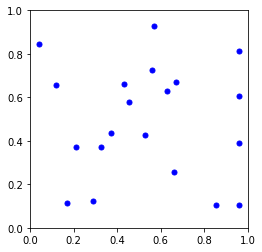

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial.distance import pdist, squareform
from celluloid import Camera

v0 = 1/2
N = 20
dt = 1./60
time = 10
t = np.arange(0,time,dt)
size = 0.04
bounds = [0, 1, 0, 1]
M = 1

np.random.seed(0)
contaminated = [False] * N
contaminated[0] = True
particles = np.random.rand(N,4)

def step(particles,dt):

    # update position
    particles[:,0] += particles[:,2] * dt
    particles[:,1] += particles[:,3] * dt

    # update velocity
    D = squareform(pdist(particles[:, :2]))
    ind1, ind2 = np.where(D < 2 * size)
    unique = (ind1 < ind2)
    ind1 = ind1[unique]
    ind2 = ind2[unique]
    for i1, i2 in zip(ind1, ind2):

        # location vector
        r1 = particles[i1, :2]
        r2 = particles[i2, :2]

        # velocity vector
        v1 = particles[i1, 2:]
        v2 = particles[i2, 2:]

        # relative location & velocity vectors
        r_rel = r1 - r2
        v_rel = v1 - v2

        # momentum vector of the center of mass
        v_cm = (M * v1 + M * v2) / (M + M)

        # collisions of spheres reflect v_rel over r_rel
        rr_rel = np.dot(r_rel, r_rel)
        vr_rel = np.dot(v_rel, r_rel)
        v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

        # assign new velocities
        particles[i1, 2:] = (v_cm + v_rel * M / (M + M))/np.linalg.norm(v_cm + v_rel * M / (M + M))*v0
        particles[i2, 2:] = (v_cm - v_rel * M / (M + M))/np.linalg.norm(v_cm - v_rel * M / (M + M))*v0

        # contaminate particles
        if contaminated[i1] or contaminated[i2]:
            contaminated[i1] = True
            contaminated[i2] = True

        # check if bounday crossed and reflect particle back
        crossed_x1 = (particles[:, 0] < bounds[0] + size)
        crossed_x2 = (particles[:, 0] > bounds[1] - size)
        crossed_y1 = (particles[:, 1] < bounds[2] + size)
        crossed_y2 = (particles[:, 1] > bounds[3] - size)

        particles[crossed_x1, 0] = bounds[0] + size
        particles[crossed_x2, 0] = bounds[1] - size

        particles[crossed_y1, 1] = bounds[2] + size
        particles[crossed_y2, 1] = bounds[3] - size

        particles[crossed_x1 | crossed_x2, 2] *= -1
        particles[crossed_y1 | crossed_y2, 3] *= -1

    return(particles)



# set up figure and animation

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))
c = ['red' if i == True else 'blue' for i in contaminated]
point, = ax.plot(particles[:,0],particles[:,1],'bo')
ms = int(fig.dpi * 2 * size * fig.get_figwidth()
         / np.diff(ax.get_xbound())[0])
point.set_markersize(ms)
ax.set_xlim([bounds[0],bounds[1]])
ax.set_ylim([bounds[2],bounds[3]])
def animate(i):
    global particles, dt, contaminated
    c = ['red' if i == True else 'blue' for i in contaminated]
    particles = step(particles,dt)
    point.set_data(particles[:,0],particles[:,1])
    print('Number of contaminated cases = ', sum(contaminated))
#    point.set_color(c)
    return point
ani = animation.FuncAnimation(fig,animate,frames=600,interval=1)
plt.show()


Unfortunately I couldn't figure out how to change the color of the points with this code. So, instead, I listed the number of contaminated individuals with each animation loop. This does not animate with jupyter, but it does when executing the code in a terminal.